In [89]:
import pandas as pd
import numpy as np
data = pd.read_csv('SAT to GPA.csv')
print(data.head())

   SAT Score  GPA
0       1600  4.0
1       1593  4.0
2       1587  4.0
3       1580  4.0
4       1573  4.0


Text(0.5, 1.0, 'Plot of Score vs CGPA')

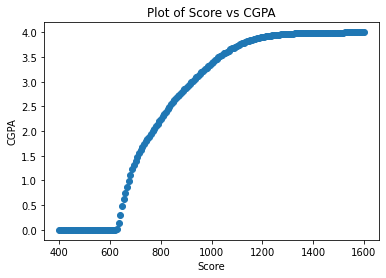

In [90]:
import matplotlib.pyplot as plt
plt.scatter(data["SAT Score"] , data["GPA"])
plt.xlabel("Score")
plt.ylabel("CGPA")
plt.title("Plot of Score vs CGPA")

The data is about the Score obtained by a student in a class vs the Cgpa of the student.


We have to predict the Score of a student based on his/her Cgpa. or the other way around.

We don't need any kind of preprocessing for this data.

In [91]:
x = data["SAT Score"]
print(f"Dimension of x are :- {x.shape}")
y = data["GPA"]
print(f"Dimension of y are :- {y.shape}")


Dimension of x are :- (181,)
Dimension of y are :- (181,)


Since the dimension of the data is not compatible that it can be trained on, we have to use some kind of preprocessing.

In [92]:
x = data["SAT Score"].values.reshape(-1, 1)
print(f"Dimension of x are :- {x.shape}")
y = data["GPA"].values.reshape(-1, 1)
print(f"Dimension of y are :- {y.shape}")

Dimension of x are :- (181, 1)
Dimension of y are :- (181, 1)


In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
scaler = StandardScaler().fit(y)
y = scaler.transform(y)

In [94]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)
print(f"the slope of the regression line is :- {reg.coef_[0][0]:.3}")
print(f"the intecept of the regression line is :- {reg.intercept_[0]:.3}")
print(f"the equation of the regression line is :- {reg.coef_[0][0]:.3}*y + {reg.intercept_[0]:.3}")

the slope of the regression line is :- 0.939
the intecept of the regression line is :- 0.0255
the equation of the regression line is :- 0.939*y + 0.0255


Text(0.5, 1.0, 'Plot of Score vs CGPA')

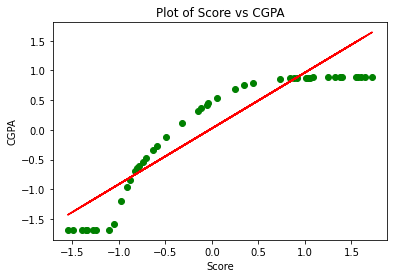

In [95]:
predict = reg.predict(xtest)
plt.scatter(xtest,ytest,c='green')
plt.plot(xtest, predict, c='red')
plt.xlabel("Score")
plt.ylabel("CGPA")
plt.title("Plot of Score vs CGPA")

In [96]:
from sklearn.metrics import mean_absolute_error

mean_square_root_error = mean_absolute_error(ytest,predict)
print(f"The mean square error of the model is :- {mean_square_root_error:.3}")
rmse = np.sqrt(mean_square_root_error)
print(f"The Root mean square error of the model is :- {rmse:.3}")

The mean square error of the model is :- 0.337
The Root mean square error of the model is :- 0.581


The reason of the erorr is that the data is not linearly separable.